# 1. Introduction

We aim to accomplish the following for this study:

- Identify which factors contribute to customer churn

- Build a prediction model that can classify if a customer is going to churn or not. 

Preferably and based on model performance, we will choose a model that can attach a probability to the churn. This will help the bank to target the most relevant customers in their efforts to prevent churn

# 2. Dataset Review

In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [612]:
df = pd.read_csv("datasets/churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [613]:
df.shape

(10000, 14)

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [615]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [616]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [617]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [618]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [619]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Questions / Observations: 
1. Why a large % of people exited but still have balance in their account?
2. What does IsActiveMember mean? Some active members have exited the bank and have 0 balance in their account!
3. Understanding which products customers bought rather than product count could improve the model performance.
4. Balance is measured at a particular point in time. The final balance in the accounts is influenced by whether a customer churned or not, thus it is likely to introduce target leakage in the data. The transaction volume rather than the balance could be a better indicator.  

# 3. Exploratory Data Analysis

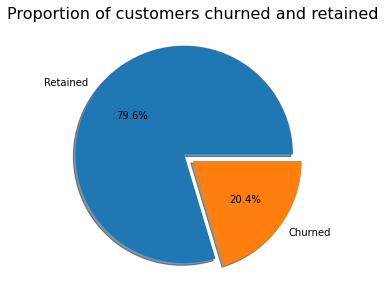

In [641]:
labels = 'Retained', 'Churned'
sizes = [df["Exited"][df['Exited']==0].count(), df["Exited"][df['Exited']==1].count()]
explode = (0.1, 0)
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, labels=labels, explode=explode,  autopct='%.1f%%')
plt.title("Proportion of customers churned and retained", size = 16)
plt.show()

- Apromimately 20% of the customers have churned. Baseline accuracy is 80%. 
- As retaining a customer is many times cheaper than acquiring a new one, we want to prioritize recall over precision.

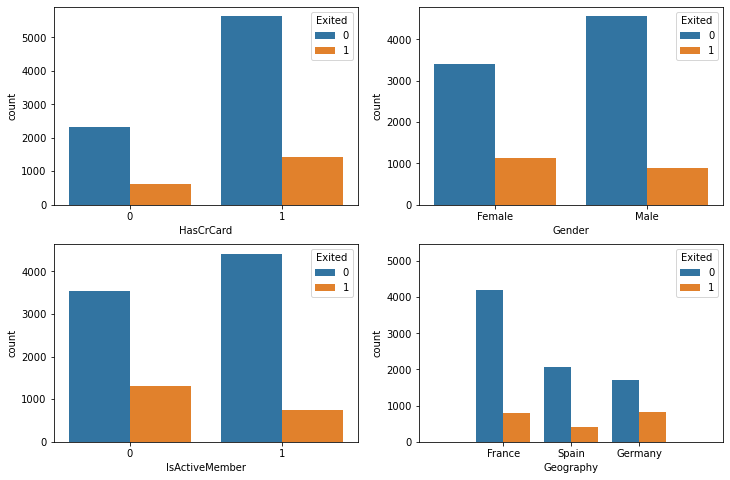

In [621]:
# Reviw ouput's relationship with the categorical variables
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x="HasCrCard", hue="Exited", data=df, ax = ax[0, 0])
sns.countplot(x="Gender", hue="Exited", data=df, ax = ax[0, 1])
sns.countplot(x="IsActiveMember", hue="Exited", data=df, ax = ax[1, 0])
sns.countplot(x="Geography", hue="Exited", data=df, ax = ax[1, 1])
plt.margins(0.3)
plt.show()

Observations:

- The proportion of female churners is greater than that of males.
- Active members churn less, unsurprisingly. There is a large proportion of inactive users
- Majority of the data is from persons from France. Highest proportion of churners from Germany.


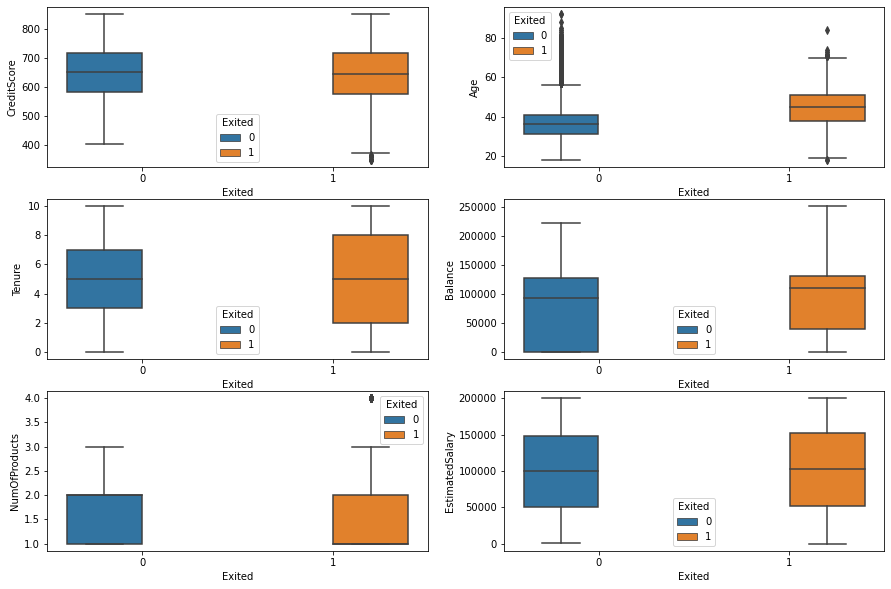

In [622]:
# Review output's relationship with numerical variables
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited', data = df, ax = ax[0][0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited', data = df , ax = ax[0][1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited', data = df, ax = ax[1][0])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited', data = df, ax = ax[1][1])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited', data = df, ax = ax[2][0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax = ax[2][1])
plt.show()

Observations:

- Customers with very low credit score are more likely to churn, but otherwise, the distribution looks very similar. 
- Older customers churn more. The bank may need to review the strategy for retention between the different age groups.
- Customers with extreme values for tenure (less than 1 year or more than 10 years) are more likely to churn compared to those in between. 
- Customers with higher balances churn more, worringly.
- Neither the number of products nor salary have a significant effect on the likelihood to churn.

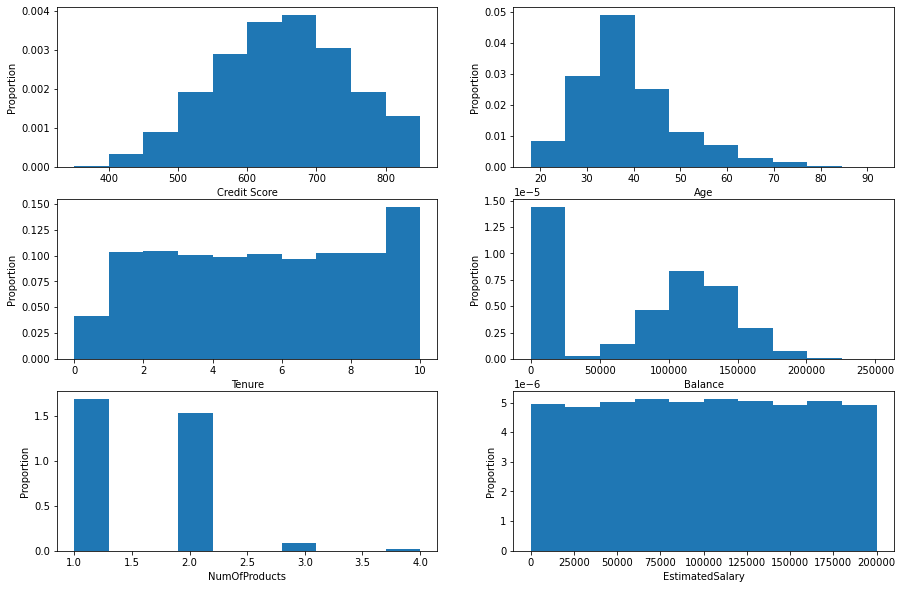

In [623]:
# Review distributions of numerical variables
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
ax[0][0].hist('CreditScore', data = df, density=True)
ax[0][0].set_ylabel("Proportion")
ax[0][0].set_xlabel("Credit Score")
ax[0][1].hist('Age', data = df, density=True)
ax[0][1].set_ylabel("Proportion")
ax[0][1].set_xlabel("Age")
ax[1][0].hist('Tenure', data = df, density=True)
ax[1][0].set_ylabel("Proportion")
ax[1][0].set_xlabel("Tenure")
ax[1][1].hist('Balance', data = df, density=True)
ax[1][1].set_ylabel("Proportion")
ax[1][1].set_xlabel("Balance")
ax[2][0].hist('NumOfProducts', data = df, density=True)
ax[2][0].set_ylabel("Proportion")
ax[2][0].set_xlabel("NumOfProducts")
ax[2][1].hist('EstimatedSalary', data = df, density=True)
ax[2][1].set_ylabel("Proportion")
ax[2][1].set_xlabel("EstimatedSalary")
plt.show()

# 4. Feature Engineering

In [624]:
from sklearn.model_selection import train_test_split
y = df.Exited
X = df.drop(columns=["Exited"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

Note: the test set is there solely for performance assessment of your model, and it should not be used in any stage of model building, including feature selection. Thus, we perform the train-test split before manipulating the dataset in any way.

<ipython-input-625-615a3b2a6794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["BalanceSalaryRatio"] = X_train.Balance/X_train.EstimatedSalary
<ipython-input-625-615a3b2a6794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["TenureAgeRatio"] = X_train.Tenure/X_train.Age


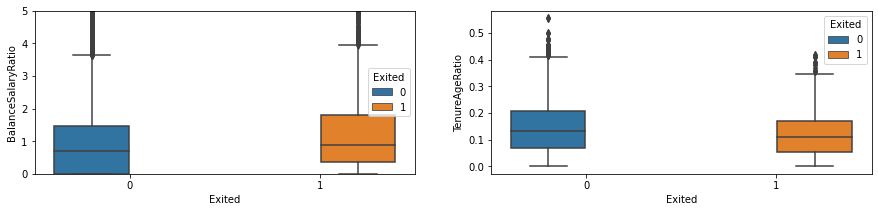

In [625]:
X_train["BalanceSalaryRatio"] = X_train.Balance/X_train.EstimatedSalary
X_train["TenureAgeRatio"] = X_train.Tenure/X_train.Age

fig, ax = plt.subplots(1, 2, figsize = (15, 3), squeeze=False)
sns.boxplot(y = X_train['BalanceSalaryRatio'], x = y_train, hue = y_train, ax = ax[0][0])
ax[0][0].set_ylim(0, 5)
sns.boxplot(y = X_train['TenureAgeRatio'], x = y_train, hue = y_train, ax = ax[0][1])
plt.show()

# 5. Data Prep for Model Fitting

In [626]:
# Arrange columns by data type for easier manipulation
num_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureAgeRatio']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
X_train = X_train[num_vars + cat_vars]
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureAgeRatio,HasCrCard,IsActiveMember,Geography,Gender
2151,753,57,7,0.00,1,159475.08,0.000000,0.122807,1,0,France,Male
8392,739,32,3,102128.27,1,63981.37,1.596219,0.093750,1,0,Germany,Male
5006,755,37,0,113865.23,2,117396.25,0.969922,0.000000,1,1,Germany,Female
4117,561,37,5,0.00,2,83093.25,0.000000,0.135135,1,0,France,Male
7182,692,49,6,110540.43,2,107472.99,1.028541,0.122449,0,1,Germany,Male


In [627]:
# minMax scaling the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train[num_vars])
X_train[num_vars] = scaler.transform(X_train[num_vars])
X_train.head()

# Manually:

#X_test = X_test[num_vars + cat_vars]
#minVec = X_test[num_vars].min().copy()
#maxVec = X_test[num_vars].max().copy()
#X_test[num_vars] = (X_test[num_vars]-minVec)/(maxVec-minVec)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureAgeRatio,HasCrCard,IsActiveMember,Geography,Gender
2151,0.806,0.527027,0.7,0.000000,0.000000,0.797394,0.000000,0.221053,1,0,France,Male
8392,0.778,0.189189,0.3,0.428413,0.000000,0.319879,0.000150,0.168750,1,0,Germany,Male
5006,0.810,0.256757,0.0,0.477648,0.333333,0.586979,0.000091,0.000000,1,1,Germany,Female
4117,0.422,0.256757,0.5,0.000000,0.333333,0.415448,0.000000,0.243243,1,0,France,Male
7182,0.684,0.418919,0.6,0.463700,0.333333,0.537358,0.000097,0.220408,0,1,Germany,Male


In [628]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (X_train[i].dtype == str or X_train[i].dtype == object):
        for j in X_train[i].unique():
            X_train[i+'_'+j] = np.where(X_train[i] == j,1,0)
        remove.append(i)
X_train = X_train.drop(remove, axis=1)
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureAgeRatio,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,Gender_Female
2151,0.806,0.527027,0.7,0.000000,0.000000,0.797394,0.000000,0.221053,1,0,1,0,0,1,0
8392,0.778,0.189189,0.3,0.428413,0.000000,0.319879,0.000150,0.168750,1,0,0,1,0,1,0
5006,0.810,0.256757,0.0,0.477648,0.333333,0.586979,0.000091,0.000000,1,1,0,1,0,0,1
4117,0.422,0.256757,0.5,0.000000,0.333333,0.415448,0.000000,0.243243,1,0,1,0,0,1,0
7182,0.684,0.418919,0.6,0.463700,0.333333,0.537358,0.000097,0.220408,0,1,0,1,0,1,0


In [629]:
# Data prep pipeline for test data
X_test["BalanceSalaryRatio"] = X_test.Balance/X_test.EstimatedSalary
X_test["TenureAgeRatio"] = X_test.Tenure/X_test.Age
X_test = X_test[num_vars + cat_vars]
X_test[num_vars] = scaler.transform(X_test[num_vars])
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (X_test[i].dtype == str or X_test[i].dtype == object):
        for j in X_test[i].unique():
            X_test[i+'_'+j] = np.where(X_test[i] == j,1,0)
        remove.append(i)
X_test = X_test.drop(remove, axis=1)

<ipython-input-629-18d4962e917b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["BalanceSalaryRatio"] = X_test.Balance/X_test.EstimatedSalary
<ipython-input-629-18d4962e917b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["TenureAgeRatio"] = X_test.Tenure/X_test.Age


# 6. Model Fitting and Selection

For the model fitting, we will try out the following:

- Logistic regression
- LDA
- SVM
- Ensemble models

In [630]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [631]:
# Define a function to return the best model score and parameters
def best_model(model):
    print(model.best_params_)
    print(model.best_estimator_)
    print("Train Score: ", model.best_score_)    
    print("Test Score: ", log_primal_Grid.score(X_test, y_test))
    
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

### Logistic Regression

Logistic regression does not really have any critical hyperparameters to tune.

- Sometimes, you can see useful differences in performance or convergence with different solvers:
[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]

- Regularization (penalty) can sometimes be helpful:
[‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Note: not all solvers support all regularization terms.

- The C parameter controls the penality strength, which can also be effective:
[100, 10, 1.0, 0.1, 0.01]

In [632]:
# Logistic regression fit with linear kernel
param_grid = {'C': [0.1, 0.5, 1, 10, 50, 100],
              'penalty':["l1", "l2"]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, verbose=0)
log_primal_Grid.fit(X_train, y_train)
best_model(log_primal_Grid)

{'C': 0.1, 'penalty': 'l1'}
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Train Score:  0.812125
Test Score:  0.812
